In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('euro_exchange_rate.csv')
df

,Date,USD,JPY,BGN,CYP,CZK,DKK,EEK,GBP,HUF,...,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR,Unnamed: 42
0,2023-03-23,1.0879,142.87,1.9558,NaN,23.658,7.4482,NaN,0.88523,384.75,...,89.4810,1396.18,20.1915,4.8063,1.7373,59.125,1.4434,37.119,19.7787,NaN
1,2023-03-22,1.0785,143.13,1.9558,NaN,23.722,7.4472,NaN,0.87925,388.55,...,89.0800,1406.43,20.0036,4.8047,1.7362,58.683,1.4391,37.100,19.8529,NaN
2,2023-03-21,1.0776,142.63,1.9558,NaN,23.846,7.4465,NaN,0.88033,391.58,...,89.0308,1406.34,20.1454,4.8196,1.7412,58.485,1.4392,36.929,19.9659,NaN
3,2023-03-20,1.0717,140.77,1.9558,NaN,23.988,7.4450,NaN,0.87560,399.21,...,88.4900,1401.82,20.3003,4.8076,1.7106,58.281,1.4354,36.513,19.7861,NaN
4,2023-03-17,1.0623,140.57,1.9558,NaN,23.948,7.4450,NaN,0.87488,395.93,...,87.7870,1389.84,19.9829,4.7649,1.7014,58.118,1.4262,36.246,19.4988,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,1999-01-08,1.1659,130.09,NaN,0.58187,34.938,7.4433,15.6466,0.70940,250.15,...,NaN,1366.73,NaN,NaN,2.1557,NaN,1.9537,NaN,6.7855,NaN
6202,1999-01-07,1.1632,129.43,NaN,0.58187,34.886,7.4431,15.6466,0.70585,250.09,...,NaN,1337.16,NaN,NaN,2.1531,NaN,1.9436,NaN,6.8283,NaN
6203,1999-01-06,1.1743,131.42,NaN,0.58200,34.850,7.4452,15.6466,0.70760,250.67,...,NaN,1359.54,NaN,NaN,2.1890,NaN,1.9699,NaN,6.7307,NaN
6204,1999-01-05,1.1790,130.96,NaN,0.58230,34.917,7.4495,15.6466,0.71220,250.80,...,NaN,1373.01,NaN,NaN,2.2011,NaN,1.9655,NaN,6.7975,NaN


In [3]:
df.head()
print(df.columns)

Index(['Date', 'USD', 'JPY', 'BGN', 'CYP', 'CZK', 'DKK', 'EEK', 'GBP', 'HUF',
       'LTL', 'LVL', 'MTL', 'PLN', 'ROL', 'RON', 'SEK', 'SIT', 'SKK', 'CHF',
       'ISK', 'NOK', 'HRK', 'RUB', 'TRL', 'TRY', 'AUD', 'BRL', 'CAD', 'CNY',
       'HKD', 'IDR', 'ILS', 'INR', 'KRW', 'MXN', 'MYR', 'NZD', 'PHP', 'SGD',
       'THB', 'ZAR', 'Unnamed: 42'],
      dtype='object')


In [4]:
df=df.drop('Unnamed: 42', axis=1)
df.columns

Index(['Date', 'USD', 'JPY', 'BGN', 'CYP', 'CZK', 'DKK', 'EEK', 'GBP', 'HUF',
       'LTL', 'LVL', 'MTL', 'PLN', 'ROL', 'RON', 'SEK', 'SIT', 'SKK', 'CHF',
       'ISK', 'NOK', 'HRK', 'RUB', 'TRL', 'TRY', 'AUD', 'BRL', 'CAD', 'CNY',
       'HKD', 'IDR', 'ILS', 'INR', 'KRW', 'MXN', 'MYR', 'NZD', 'PHP', 'SGD',
       'THB', 'ZAR'],
      dtype='object')

## Impute Missing values

In [5]:
df.isnull().sum()

Date       0
USD        0
JPY        0
BGN      398
CYP     3902
CZK        0
DKK        0
EEK     3132
GBP        0
HUF        0
LTL     2109
LVL     2364
MTL     3902
PLN        0
ROL     4542
RON     1664
SEK        0
SIT     4157
SKK     3646
CHF        0
ISK     2341
NOK        0
HRK     1658
RUB     1873
TRL     4669
TRY     1537
AUD        0
BRL     2304
CAD        0
CNY     1599
HKD        0
IDR     1599
ILS     3074
INR     2560
KRW        0
MXN     2304
MYR     1599
NZD        0
PHP     1599
SGD        0
THB     1599
ZAR        0
dtype: int64

To detect any null value, used df.isnull().sum() to get the number of missing records in each column.

In [6]:
(df.isnull().sum()/(len(df)))*100

Date     0.000000
USD      0.000000
JPY      0.000000
BGN      6.413149
CYP     62.874637
CZK      0.000000
DKK      0.000000
EEK     50.467290
GBP      0.000000
HUF      0.000000
LTL     33.983242
LVL     38.092169
MTL     62.874637
PLN      0.000000
ROL     73.187238
RON     26.812762
SEK      0.000000
SIT     66.983564
SKK     58.749597
CHF      0.000000
ISK     37.721560
NOK      0.000000
HRK     26.716081
RUB     30.180471
TRL     75.233645
TRY     24.766355
AUD      0.000000
BRL     37.125363
CAD      0.000000
CNY     25.765388
HKD      0.000000
IDR     25.765388
ILS     49.532710
INR     41.250403
KRW      0.000000
MXN     37.125363
MYR     25.765388
NZD      0.000000
PHP     25.765388
SGD      0.000000
THB     25.765388
ZAR      0.000000
dtype: float64

Used (df.isnull().sum()/(len(df)))*100 code to calculate the percentage of missing values in each column. We can see that CYP has 62% of missing value while the TRL is 75% of missing value which is very high. 

In [7]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

In [8]:
print(rows_with_NaN)

            Date     USD     JPY     BGN      CYP     CZK     DKK      EEK  \
0     2023-03-23  1.0879  142.87  1.9558      NaN  23.658  7.4482      NaN   
1     2023-03-22  1.0785  143.13  1.9558      NaN  23.722  7.4472      NaN   
2     2023-03-21  1.0776  142.63  1.9558      NaN  23.846  7.4465      NaN   
3     2023-03-20  1.0717  140.77  1.9558      NaN  23.988  7.4450      NaN   
4     2023-03-17  1.0623  140.57  1.9558      NaN  23.948  7.4450      NaN   
...          ...     ...     ...     ...      ...     ...     ...      ...   
6201  1999-01-08  1.1659  130.09     NaN  0.58187  34.938  7.4433  15.6466   
6202  1999-01-07  1.1632  129.43     NaN  0.58187  34.886  7.4431  15.6466   
6203  1999-01-06  1.1743  131.42     NaN  0.58200  34.850  7.4452  15.6466   
6204  1999-01-05  1.1790  130.96     NaN  0.58230  34.917  7.4495  15.6466   
6205  1999-01-04  1.1789  133.73     NaN  0.58231  35.107  7.4501  15.6466   

          GBP     HUF  ...     ILS      INR      KRW      MXN  

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6206 entries, 0 to 6205
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6206 non-null   datetime64[ns]
 1   USD     6206 non-null   float64       
 2   JPY     6206 non-null   float64       
 3   BGN     5808 non-null   float64       
 4   CYP     2304 non-null   float64       
 5   CZK     6206 non-null   float64       
 6   DKK     6206 non-null   float64       
 7   EEK     3074 non-null   float64       
 8   GBP     6206 non-null   float64       
 9   HUF     6206 non-null   float64       
 10  LTL     4097 non-null   float64       
 11  LVL     3842 non-null   float64       
 12  MTL     2304 non-null   float64       
 13  PLN     6206 non-null   float64       
 14  ROL     1664 non-null   float64       
 15  RON     4542 non-null   float64       
 16  SEK     6206 non-null   float64       
 17  SIT     2049 non-null   float64       
 18  SKK     

## Statistics Summary

In [10]:
df.describe()

,USD,JPY,BGN,CYP,CZK,DKK,EEK,GBP,HUF,LTL,...,ILS,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
count,6206.000000,6206.000000,5808.000000,2304.000000,6206.000000,6206.000000,3.074000e+03,6206.000000,6206.000000,4097.000000,...,3132.000000,3646.000000,6206.000000,3902.000000,4607.000000,6206.000000,4607.000000,6206.000000,4607.000000,6206.000000
mean,1.191688,127.753489,1.954605,0.578354,28.105758,7.447978,1.564660e+01,0.776309,290.089346,3.527614,...,4.290385,75.478390,1349.864936,19.621886,4.570611,1.813450,59.238884,1.740703,41.209472,11.951035
std,0.158322,15.477305,0.002956,0.004393,3.542228,0.011335,3.375627e-14,0.099571,40.947208,0.213557,...,0.463583,8.264227,160.801311,2.830137,0.310351,0.202680,4.900066,0.217291,4.627171,3.820708
min,0.825200,89.300000,1.944100,0.570970,22.968000,7.423400,1.564660e+01,0.571100,228.160000,3.301300,...,3.253700,56.065000,938.670000,14.793900,3.819300,1.388400,46.852000,1.383800,33.204000,6.078500
25%,1.090300,117.180000,1.955800,0.574580,25.554250,7.438600,1.564660e+01,0.681013,254.550000,3.452800,...,3.935375,69.389500,1249.842500,17.064025,4.348950,1.661450,56.216000,1.567200,37.647000,8.753850
50%,1.185850,128.855000,1.955800,0.577800,27.022000,7.446900,1.564660e+01,0.802075,280.075000,3.452800,...,4.224000,76.056200,1333.480000,19.082000,4.632800,1.765250,58.869000,1.659900,39.910000,11.115650
75%,1.310525,136.167500,1.955800,0.582000,30.205000,7.458200,1.564660e+01,0.864073,312.300000,3.452800,...,4.758425,81.986750,1427.702500,21.731150,4.791000,1.965475,62.477000,1.970550,44.590000,15.336250
max,1.599000,169.750000,1.962000,0.588800,38.583000,7.473200,1.564660e+01,0.978550,430.650000,4.717400,...,5.219200,92.065000,1993.950000,27.089600,5.185700,2.553500,72.651000,2.232300,53.536000,20.845200


Used df.describe() to get a statistics summary such as Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc. This to see that the our dataset has any outliers, data entry error, distribution of data such as data distrubuted normally or left/right skewed.

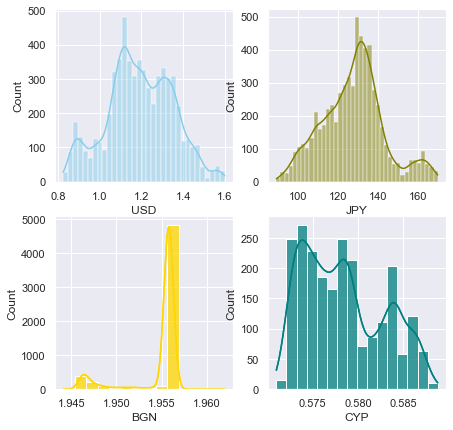

In [11]:
sns.set(style="darkgrid")
#df = sns.load_dataset("iris")

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=df, x="USD", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="JPY", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="BGN", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="CYP", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="BGN", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="CYP", kde=True, color="teal", ax=axs[1, 1])

plt.show()

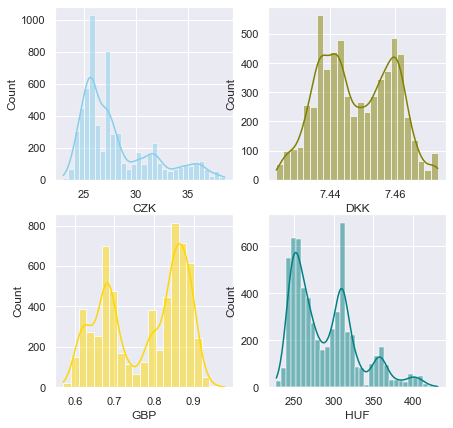

In [12]:
sns.set(style="darkgrid")
#df = sns.load_dataset("iris")

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=df, x="CZK", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="DKK", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="GBP", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="HUF", kde=True, color="teal", ax=axs[1, 1])

plt.show()

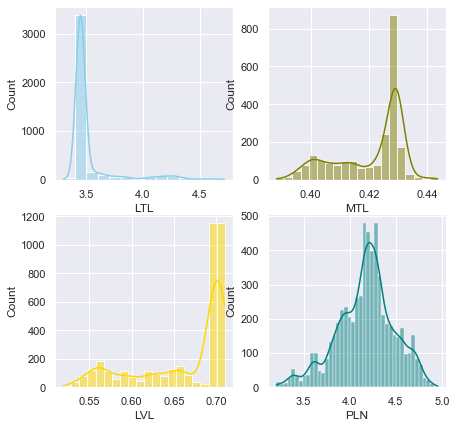

In [13]:
sns.set(style="darkgrid")
#df = sns.load_dataset("iris")

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=df, x="LTL", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="MTL", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="LVL", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="PLN", kde=True, color="teal", ax=axs[1, 1])

plt.show()

In [14]:
#plt.plot(df['x'], df['y'], color='g', label='Line y')

def plot_linechart(feat, title, axpos):
    sns.lineplot(data=df[feat], ax=axpos)
    axpos.set_title(title)
    axpos.set_xlabel(None)
    axpos.set_ylabel('')
    
x=['Date']
y=['HKD','CNY','JPY']
#plt.plot(x,y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [15]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Exchange Rate to EUR', fontsize=18, y=1)

Text(0.5, 1, 'Exchange Rate to EUR')

<Figure size 1080x1440 with 0 Axes>

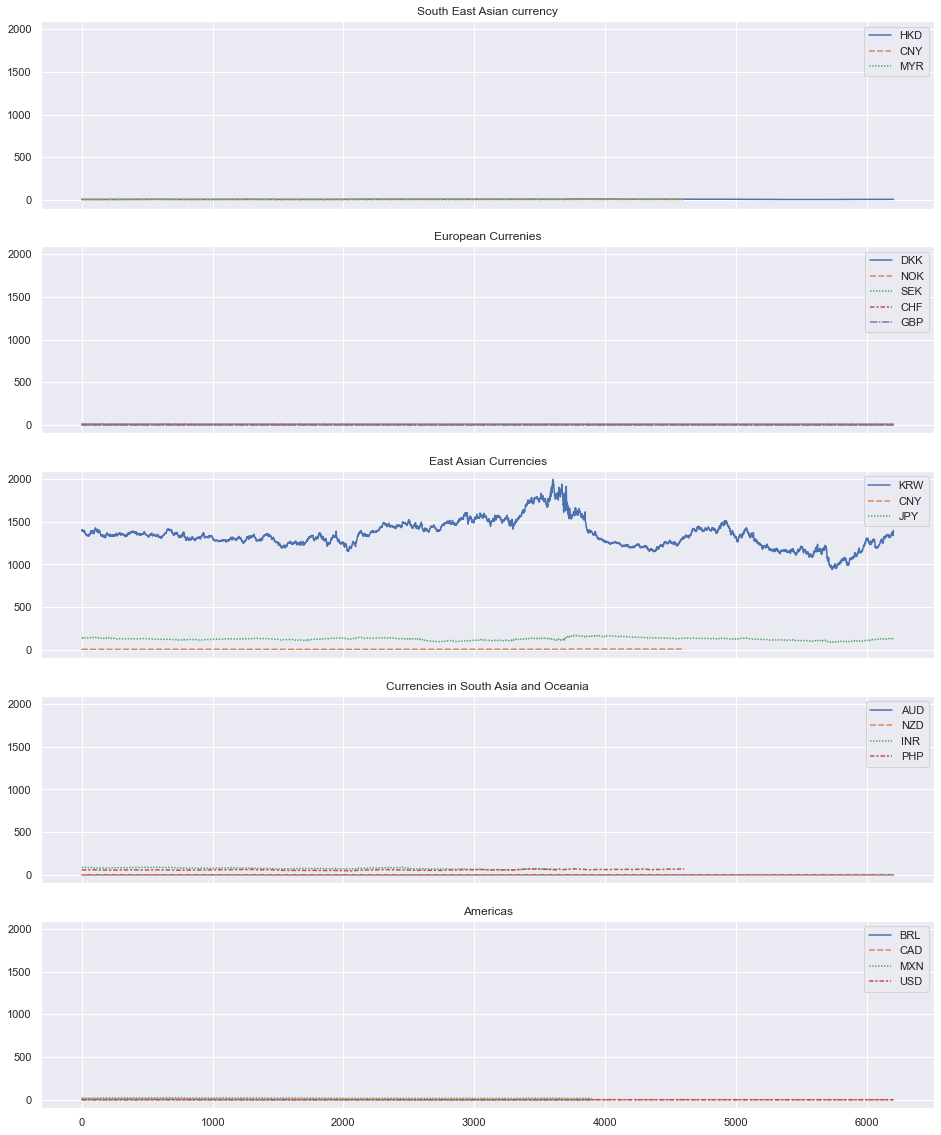

In [16]:
def plot_linechart(feat, title, axpos):
    sns.lineplot(data=df[feat], ax=axpos)
    axpos.set_title(title)
    axpos.set_xlabel(None)
    axpos.set_ylabel('')
    
fig, ax = plt.subplots(5, 1, sharey=True, sharex=True, figsize=(16,20))
plot_linechart(['HKD','CNY','MYR'], 'South East Asian currency', ax[0])
plot_linechart(['DKK','NOK','SEK','CHF','GBP'], 'European Currenies', ax[1])
plot_linechart(['KRW','CNY','JPY'], 'East Asian Currencies', ax[2])
plot_linechart(['AUD','NZD','INR','PHP'], 'Currencies in South Asia and Oceania', ax[3])
plot_linechart(['BRL','CAD','MXN','USD'], 'Americas', ax[4])

## Select variables for the model

We have chosen five widely used currencies for our model.
USD, JPY, GBP, AUD and CAD.

Extracting these fice currencies from the main dataset by df.loc() function. As it allows to access specific rows and columns of a dataframe using label-based indexing.

In [17]:
df5=df.loc[:,['Date','USD', 'JPY', 'GBP', 'AUD', 'CAD']]
df5.head()

,Date,USD,JPY,GBP,AUD,CAD
0,2023-03-23,1.0879,142.87,0.88523,1.6242,1.4875
1,2023-03-22,1.0785,143.13,0.87925,1.6132,1.4782
2,2023-03-21,1.0776,142.63,0.88033,1.6136,1.4726
3,2023-03-20,1.0717,140.77,0.87560,1.5978,1.4669
4,2023-03-17,1.0623,140.57,0.87488,1.5874,1.4584


In [18]:
df5.sort_values(by='Date', inplace = True)

In [19]:
df5.head()

,Date,USD,JPY,GBP,AUD,CAD
6205,1999-01-04,1.1789,133.73,0.71110,1.9100,1.8004
6204,1999-01-05,1.1790,130.96,0.71220,1.8944,1.7965
6203,1999-01-06,1.1743,131.42,0.70760,1.8820,1.7711
6202,1999-01-07,1.1632,129.43,0.70585,1.8474,1.7602
6201,1999-01-08,1.1659,130.09,0.70940,1.8406,1.7643


In [20]:
df5.tail()

,Date,USD,JPY,GBP,AUD,CAD
4,2023-03-17,1.0623,140.57,0.87488,1.5874,1.4584
3,2023-03-20,1.0717,140.77,0.87560,1.5978,1.4669
2,2023-03-21,1.0776,142.63,0.88033,1.6136,1.4726
1,2023-03-22,1.0785,143.13,0.87925,1.6132,1.4782
0,2023-03-23,1.0879,142.87,0.88523,1.6242,1.4875


In [21]:
df5_list = ['USD', 'JPY', 'GBP', 'AUD', 'CAD']

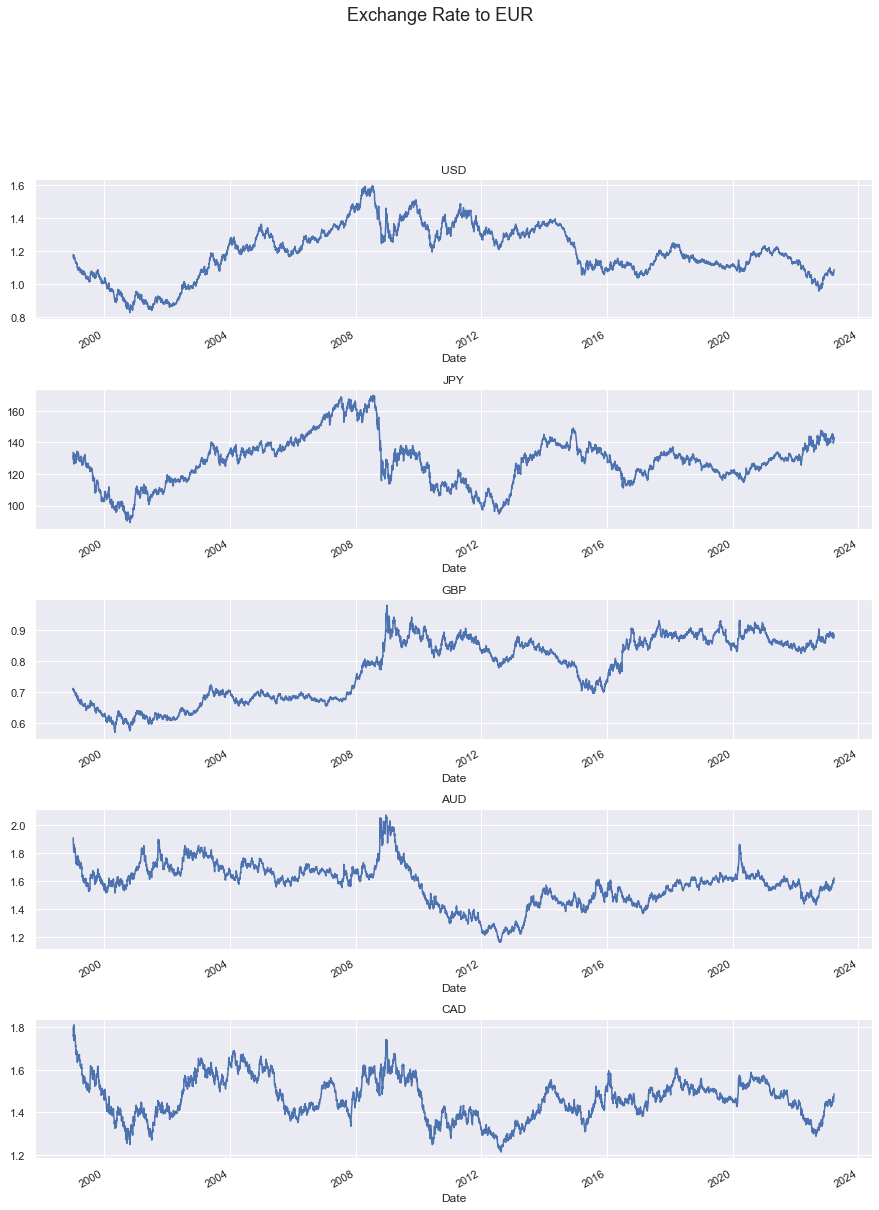

In [22]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Exchange Rate to EUR', fontsize=18,y=1)
# loop through the length of currencies and keep track of index
for n, currency in enumerate(df5_list):
    # add new subplot iteratively
    ax = plt.subplot(5,1,n+1)
    df5.plot(x='Date',y=currency,ax=ax, legend=None)
    # chart formating
    ax.set_title(currency.upper()) 

In [23]:
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models.annotations import Title
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral10

source = ColumnDataSource(df5)

output_notebook()

p = figure(plot_height = 500, \
           plot_width = 900, \
           x_axis_type = 'datetime')

p.line(x='Date', y='USD', legend_label = 'USD', source=source, color=Spectral10[1], line_width=4)
p.line(x='Date', y='JPY', legend_label = 'JPY', source=source, color=Spectral10[2], line_width=4)
p.line(x='Date', y='GBP', legend_label = 'GBP', source=source, color=Spectral10[3], line_width=4)
p.line(x='Date', y='AUD', legend_label = 'AUD', source=source, color=Spectral10[4], line_width=4)
p.line(x='Date', y='CAD', legend_label = 'CAD', source=source, color=Spectral10[5], line_width=4)


p.xaxis[0].ticker.desired_num_ticks = 20

p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Exchange Rate'

t = Title()
t.text = 'Exchange Rate: Top Countries/USD'
p.title = t

hover = HoverTool(tooltips = [
                  ('USD','@USD'),\
                  ('JPY', '@JPY'),\
                  ('GBP', '@GBP'),\
                  ('AUD', '@AUD'),\
                  ('CAD', '@CAD')])
p.add_tools(hover)
show(p)

Loading BokehJS ...

# Stationarity Check

### Perform the Augmented Dickey-Fuller (ADF)

Method 1: Perform the Augmented Dickey-Fuller (ADF)
We can alscheck for staionarity with statistical tests.

A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time.

Most of the Time Series models work on the assumption that the TS is stationary. Major reason for this is that there are many ways in which a series can be non-stationary, but only one way for stationarity.

Intuitively, we can say that if a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future.

Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

The Dickey Fuller test is used to check the stationarity of the series. The test determines how stringly a time series is defined by a trend. The null hypothesis of the test is that time series is not stationary( has some time-dependent structure).
The test result is made up of a Test Statistic and some Critical Values for different confidence levels. If P-VALUE is less than the significance level , the null hypothesis is rejected and the series is stationary.

The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. The ADF tests give the following results – test statistic, p-value, and critical value at 1%, 5%, and 10% confidence intervals

The test result is made up of a Test Statistic and some Critical Values for different confidence levels. If P-VALUE is less than the significance level , the null hypothesis is rejected and the series is stationary.

if p_value > 0.05 and the stat_value > any of the critical values:

Acceptiong the Null Hypothesis i.e Dataset is Non-Stationary
else:

Rejecting the Null Hypothesis i.e Dataset is Stationary

In [24]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [25]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [26]:
adf_test(df5['USD'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -1.739994
p-value                    0.410633
# lags used               12.000000
# observations          6193.000000
critical value (1%)       -3.431406
critical value (5%)       -2.862007
critical value (10%)      -2.567018
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [27]:
adf_test(df5['JPY'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -2.232377
p-value                    0.194705
# lags used                0.000000
# observations          6205.000000
critical value (1%)       -3.431404
critical value (5%)       -2.862006
critical value (10%)      -2.567018
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [28]:
adf_test(df5['GBP'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -1.364219
p-value                    0.599305
# lags used               22.000000
# observations          6183.000000
critical value (1%)       -3.431408
critical value (5%)       -2.862008
critical value (10%)      -2.567019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [29]:
adf_test(df5['AUD'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -2.865877
p-value                    0.049462
# lags used                5.000000
# observations          6200.000000
critical value (1%)       -3.431405
critical value (5%)       -2.862006
critical value (10%)      -2.567018
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [30]:
adf_test(df5['CAD'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -3.962444
p-value                    0.001620
# lags used               16.000000
# observations          6189.000000
critical value (1%)       -3.431407
critical value (5%)       -2.862007
critical value (10%)      -2.567019
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [31]:
df5_difference = df5.diff()

In [32]:
#Stationary
adf_test(df5_difference['USD'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -22.494993
p-value                    0.000000
# lags used               11.000000
# observations          6193.000000
critical value (1%)       -3.431406
critical value (5%)       -2.862007
critical value (10%)      -2.567018
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [33]:
#Stationary
adf_test(df5_difference['JPY'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -79.447008
p-value                    0.000000
# lags used                0.000000
# observations          6204.000000
critical value (1%)       -3.431404
critical value (5%)       -2.862006
critical value (10%)      -2.567018
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [34]:
#Stationary
adf_test(df5_difference['GBP'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.711481e+01
p-value                 7.323911e-30
# lags used             2.100000e+01
# observations          6.183000e+03
critical value (1%)    -3.431408e+00
critical value (5%)    -2.862008e+00
critical value (10%)   -2.567019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [35]:
#Stationary
adf_test(df5_difference['AUD'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -37.588584
p-value                    0.000000
# lags used                4.000000
# observations          6200.000000
critical value (1%)       -3.431405
critical value (5%)       -2.862006
critical value (10%)      -2.567018
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [36]:
adf_test(df5_difference['CAD'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -21.391541
p-value                    0.000000
# lags used               15.000000
# observations          6189.000000
critical value (1%)       -3.431407
critical value (5%)       -2.862007
critical value (10%)      -2.567019
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


## Time-step feature: add Time column 

There are two kinds of features unique to time series: time-step features and lag features.

Time-step features are features we can derive directly from the time index. The most basic time-step feature is the time dummy, which counts off time steps in the series from beginning to end.
Our dataset 'Date' column is datetime type. In Linear regression only numeric fields can be used. Therefore, used time-step feature to create time dummy as by default time dummy is integer type which corresponds to each day in time series. This way we can perform linear regression model.

In [37]:
df5['Time'] = np.arange(start=1, stop=(len(df5.index)+1), step=1 )

In [38]:
df5

,Date,USD,JPY,GBP,AUD,CAD,Time
6205,1999-01-04,1.1789,133.73,0.71110,1.9100,1.8004,1
6204,1999-01-05,1.1790,130.96,0.71220,1.8944,1.7965,2
6203,1999-01-06,1.1743,131.42,0.70760,1.8820,1.7711,3
6202,1999-01-07,1.1632,129.43,0.70585,1.8474,1.7602,4
6201,1999-01-08,1.1659,130.09,0.70940,1.8406,1.7643,5
...,...,...,...,...,...,...,...
4,2023-03-17,1.0623,140.57,0.87488,1.5874,1.4584,6202
3,2023-03-20,1.0717,140.77,0.87560,1.5978,1.4669,6203
2,2023-03-21,1.0776,142.63,0.88033,1.6136,1.4726,6204
1,2023-03-22,1.0785,143.13,0.87925,1.6132,1.4782,6205


## USD/EUR

Extract USD against EUR data from df5 for the model. 

In [39]:
#get the date and rates of US dollar
df5_usd = df5[['Date', 'USD','Time']]
df5_usd.columns = ['Date', 'USD','Time']
df5_usd.sort_values(by='Date', inplace = True)

In [40]:
df5_usd.head()

,Date,USD,Time
6205,1999-01-04,1.1789,1
6204,1999-01-05,1.1790,2
6203,1999-01-06,1.1743,3
6202,1999-01-07,1.1632,4
6201,1999-01-08,1.1659,5


In [41]:
df5_usd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6206 entries, 6205 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6206 non-null   datetime64[ns]
 1   USD     6206 non-null   float64       
 2   Time    6206 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 169.7 KB


Time dummy data type is integer by default.

Below 'pd.to_datetime()' function to separate year, month and day to analysis. 

In [42]:
df5_usd['Date'] = pd.to_datetime(df5_usd['Date'])
df5_usd['Date']

6205   1999-01-04
6204   1999-01-05
6203   1999-01-06
6202   1999-01-07
6201   1999-01-08
          ...    
4      2023-03-17
3      2023-03-20
2      2023-03-21
1      2023-03-22
0      2023-03-23
Name: Date, Length: 6206, dtype: datetime64[ns]

In [43]:
#Year
df5_usd['Date'].dt.year

6205    1999
6204    1999
6203    1999
6202    1999
6201    1999
        ... 
4       2023
3       2023
2       2023
1       2023
0       2023
Name: Date, Length: 6206, dtype: int64

In [44]:
#Month
df5_usd['Date'].dt.month

6205    1
6204    1
6203    1
6202    1
6201    1
       ..
4       3
3       3
2       3
1       3
0       3
Name: Date, Length: 6206, dtype: int64

In [45]:
#Day
df5_usd['Date'].dt.day

6205     4
6204     5
6203     6
6202     7
6201     8
        ..
4       17
3       20
2       21
1       22
0       23
Name: Date, Length: 6206, dtype: int64

In [46]:
df5_usd['year']=df5_usd['Date'].dt.year
df5_usd['month']=df5_usd['Date'].dt.month
df5_usd['day']=df5_usd['Date'].dt.day

In [47]:
df5_usd

,Date,USD,Time,year,month,day
6205,1999-01-04,1.1789,1,1999,1,4
6204,1999-01-05,1.1790,2,1999,1,5
6203,1999-01-06,1.1743,3,1999,1,6
6202,1999-01-07,1.1632,4,1999,1,7
6201,1999-01-08,1.1659,5,1999,1,8
...,...,...,...,...,...,...
4,2023-03-17,1.0623,6202,2023,3,17
3,2023-03-20,1.0717,6203,2023,3,20
2,2023-03-21,1.0776,6204,2023,3,21
1,2023-03-22,1.0785,6205,2023,3,22


In [48]:
#Lineplot- groupby by year and it's mean.
data_year = df5_usd.groupby('year')['USD'].mean().reset_index(name='USD')

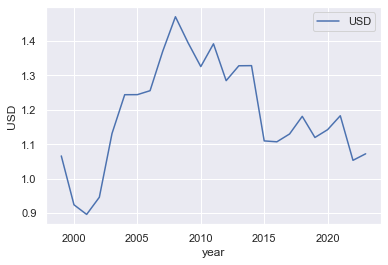

In [49]:
# Using lineplot to visualize the Time plot
sns.lineplot(data=data_year, x="year", y="USD", label='USD')
plt.figsize=(5,3)
plt.show()

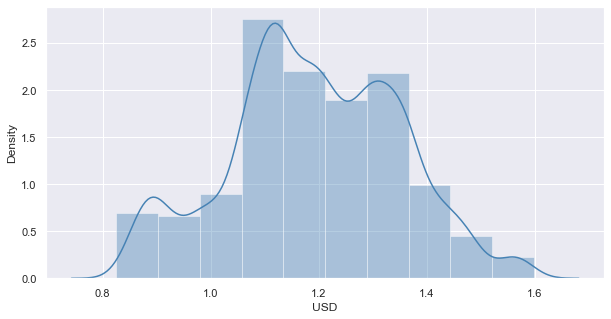

In [50]:
plt.figure(figsize=(10,5))
sns.distplot(df5_usd.USD, bins=10, color='steelblue');

## Split data

In [51]:
# Training data
X_usd = df5_usd.loc[:, ['Time']]  
y_usd = df5_usd.loc[:, 'USD']  

In [52]:
X_usd_log = np.log(X_usd) # Tranformation need

Used np.log() function as need to transfrom X(Time) variable to improve the model. 
Log differencing involves taking the logarithm of a time series and then taking the first-order difference of the resulting sequence.

It’s a very common transformation in finance, where the log difference of a time series is often used to model the returns of a stock or other financial instrument.

In [53]:
# Training data
X_usd = df5_usd.loc[:, ['Time']]  
y_usd = df5_usd.loc[:, 'USD'] 

In [54]:
#Split data into training and test set model
X_train_usd, X_test_usd, y_train_usd, y_test_usd = train_test_split(X_usd_log, y_usd, test_size=0.2, shuffle=False)

In [55]:
#Split data into training and test set plot 
X_train_usd_plot, X_test_usd_plot, y_train_usd_plot, y_test_usd_plot = train_test_split(X_usd, y_usd, test_size=0.2, shuffle=False)

In [56]:
print(X_train_usd, y_train_usd)

          Time
6205  0.000000
6204  0.693147
6203  1.098612
6202  1.386294
6201  1.609438
...        ...
1246  8.509161
1245  8.509363
1244  8.509564
1243  8.509766
1242  8.509967

[4964 rows x 1 columns] 6205    1.1789
6204    1.1790
6203    1.1743
6202    1.1632
6201    1.1659
         ...  
1246    1.1805
1245    1.1781
1244    1.1759
1243    1.1794
1242    1.1708
Name: USD, Length: 4964, dtype: float64


## Linear Regression model

In [57]:
# Train the model
model_usd = LinearRegression()
model_usd.fit(X_train_usd, y_train_usd)

LinearRegression()

Define the linear regression model below using 'model_usd.intercept_' and 'model_usd.coef_' function.

In [58]:
model_usd.intercept_   ## USD = a + b* Time  --> a = intercept_

0.5477754553838311

In [59]:
model_usd.coef_        ## USD = a + b* Time  --> b = coef_

array([0.08792524])

In [60]:
model_usd.intercept_   ## USD = a + b* Time  --> a = intercept_

0.5477754553838311

In [61]:
model_usd.coef_   ## USD = a + b* Time  --> b = coef_

array([0.08792524])

Linear regression model is as follows:

    Linear regression model equation: y = a + b*X
    
    Our final model: USD = 0.547 + 0.087*Time    

In [62]:
y_pred_usd = model_usd.predict(X_test_usd)
y_pred_usd

array([1.29603406, 1.29605177, 1.29606947, ..., 1.31562213, 1.3156363 ,
       1.31565047])

In [63]:
r_sq = model_usd.score(X_train_usd, y_train_usd)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.26278240169373057


## Prediction

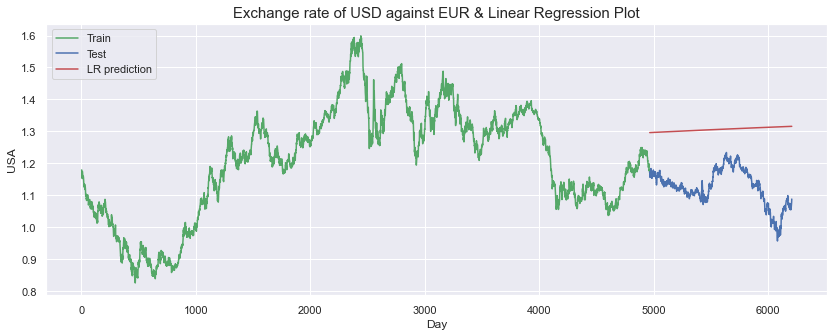

In [164]:
plt.figure(figsize=(14,5))
plt.plot(X_train_usd_plot['Time'], y_train_usd_plot, color='g', label = 'Train' ) 
plt.plot(X_test_usd_plot['Time'], y_test_usd_plot, color='b', label = 'Test') 
plt.plot(X_test_usd_plot['Time'], y_pred_usd, color='r', label = 'LR prediction') 
plt.legend(loc="upper left")
plt.title('Exchange rate of USD against EUR & Linear Regression Plot', family='Arial', fontsize=15)
plt.xlabel('Day')
plt.ylabel('USA')
plt.show()

In [166]:
mse = mean_squared_error(y_test_usd, y_pred_usd)
mae = mean_absolute_error(y_test_usd, y_pred_usd) # remove
mape = mean_absolute_percentage_error(y_test_usd, y_pred_usd)
rmse = np.sqrt(mean_squared_error(y_test_usd, y_pred_usd))
accuracy = (1-rmse)*100


print('Mean Absolute Error:              ', mae)
print('Mean Squared Error:               ', mse)
print('Root Mean Squared Error:          ', rmse)
print('Mean Absolute Percentage Error:   ', mape)
print('accuracy:                         ', accuracy)

Mean Absolute Error:               0.18044421942612218
Mean Squared Error:                0.03609161335598534
Root Mean Squared Error:           0.18997792860220722
Mean Absolute Percentage Error:    0.16347692402268194
accuracy:                          81.00220713977929


## JPY/EUR

In [66]:
#get the date and rates of US dollar
df5_jpy = df5[['Date', 'JPY','Time']]
df5_jpy.columns = ['Date', 'JPY','Time']
df5_jpy.sort_values(by='Date', inplace = True)

In [67]:
df5_jpy.head()

,Date,JPY,Time
6205,1999-01-04,133.73,1
6204,1999-01-05,130.96,2
6203,1999-01-06,131.42,3
6202,1999-01-07,129.43,4
6201,1999-01-08,130.09,5


In [68]:
df5_jpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6206 entries, 6205 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6206 non-null   datetime64[ns]
 1   JPY     6206 non-null   float64       
 2   Time    6206 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 169.7 KB


Time dummy data type is integer by default.

Below 'pd.to_datetime()' function to separate year, month and day to analysis. 

In [69]:
df5_jpy['Date'] = pd.to_datetime(df5_jpy['Date'])
df5_jpy['Date']

6205   1999-01-04
6204   1999-01-05
6203   1999-01-06
6202   1999-01-07
6201   1999-01-08
          ...    
4      2023-03-17
3      2023-03-20
2      2023-03-21
1      2023-03-22
0      2023-03-23
Name: Date, Length: 6206, dtype: datetime64[ns]

In [70]:
#Year
df5_jpy['Date'].dt.year

6205    1999
6204    1999
6203    1999
6202    1999
6201    1999
        ... 
4       2023
3       2023
2       2023
1       2023
0       2023
Name: Date, Length: 6206, dtype: int64

In [71]:
#Month
df5_jpy['Date'].dt.month

6205    1
6204    1
6203    1
6202    1
6201    1
       ..
4       3
3       3
2       3
1       3
0       3
Name: Date, Length: 6206, dtype: int64

In [72]:
#Day
df5_jpy['Date'].dt.day

6205     4
6204     5
6203     6
6202     7
6201     8
        ..
4       17
3       20
2       21
1       22
0       23
Name: Date, Length: 6206, dtype: int64

In [73]:
df5_jpy['year']=df5_jpy['Date'].dt.year
df5_jpy['month']=df5_jpy['Date'].dt.month
df5_jpy['day']=df5_jpy['Date'].dt.day
df5_jpy

,Date,JPY,Time,year,month,day
6205,1999-01-04,133.73,1,1999,1,4
6204,1999-01-05,130.96,2,1999,1,5
6203,1999-01-06,131.42,3,1999,1,6
6202,1999-01-07,129.43,4,1999,1,7
6201,1999-01-08,130.09,5,1999,1,8
...,...,...,...,...,...,...
4,2023-03-17,140.57,6202,2023,3,17
3,2023-03-20,140.77,6203,2023,3,20
2,2023-03-21,142.63,6204,2023,3,21
1,2023-03-22,143.13,6205,2023,3,22


In [74]:
#Lineplot- groupby by year and it's mean.
data_year = df5_jpy.groupby('year')['JPY'].mean().reset_index(name='JPY')

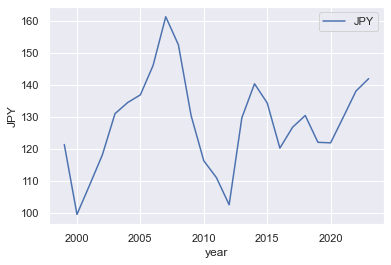

In [75]:
# Using lineplot to visualize the Time plot of USD
sns.lineplot(data=data_year, x="year", y="JPY", label='JPY')
plt.figsize=(5,3)
#plt.grid()
plt.show()

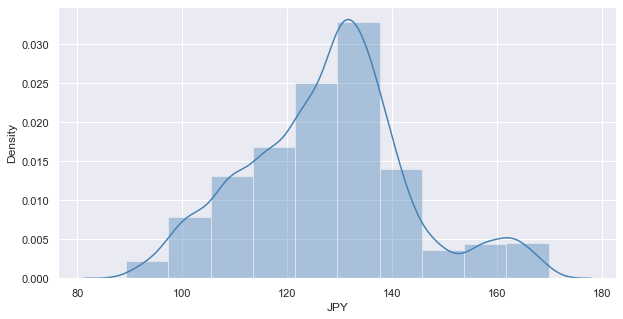

In [76]:
plt.figure(figsize=(10,5))
sns.distplot(df5_jpy.JPY, bins=10, color='steelblue');

## Split data

In [77]:
# Training data
X_jpy = df5_jpy.loc[:, ['Time']]  # features
y_jpy = df5_jpy.loc[:, 'JPY']  # target

In [78]:
X_jpy_log = np.log(X_jpy) # Tranformation need  X_log = np.log(X) # Tranformation need

Used np.log() function as need to transfrom X(Time) variable to improve the model.

In [79]:
#Split data into training and test set model
X_train_jpy, X_test_jpy, y_train_jpy, y_test_jpy = train_test_split(X_jpy_log, y_jpy, test_size=0.2, shuffle=False)

In [80]:
#Split data into training and test set plot 
X_train_jpy_plot, X_test_jpy_plot, y_train_jpy_plot, y_test_jpy_plot = train_test_split(X_jpy, y_jpy, test_size=0.2, shuffle=False)

## Linear regression model

In [81]:
# Train the model
model_jpy = LinearRegression()
model_jpy.fit(X_train_jpy, y_train_jpy)

LinearRegression()

Define the linear regression model below using 'model_usd.intercept_' and 'model_usd.coef_' function.

In [82]:
model_jpy.intercept_   ## USD = a + b* Time  --> a = intercept_

98.90275214259789

In [83]:
model_jpy.coef_   ## USD = a + b* Time  --> b = coef_

array([3.80783714])

Linear regression model is as follows:

    Linear regression model equation: y = a + b*X

    Our final model: JPY = 98.902 + 3.8078*Time     

In [84]:
y_pred_jpy = model_jpy.predict(X_test_jpy)
y_pred_jpy

array([131.30808814, 131.308855  , 131.3096217 , ..., 132.1564017 ,
       132.15701543, 132.15762905])

In [85]:
r_sq = model_jpy.score(X_train_jpy, y_train_jpy)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.05043116074809306


## Prediction

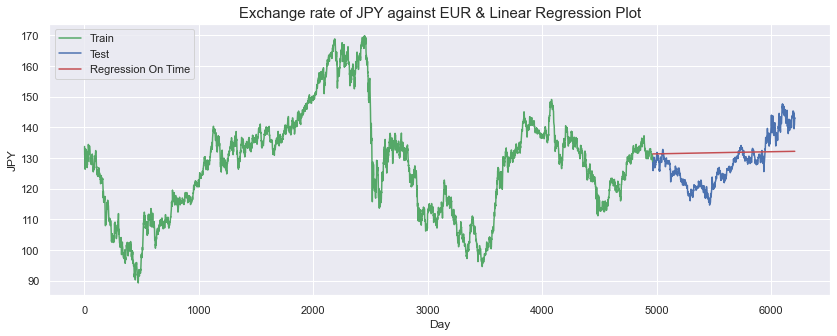

In [86]:
plt.figure(figsize=(14,5))
plt.plot(X_train_jpy_plot['Time'], y_train_jpy_plot, color='g', label = 'Train' ) 
plt.plot(X_test_jpy_plot['Time'], y_test_jpy_plot, color='b', label = 'Test') 
plt.plot(X_test_jpy_plot['Time'], y_pred_jpy, color='r', label = 'Regression On Time') 
plt.legend(loc="upper left")
plt.title('Exchange rate of JPY against EUR & Linear Regression Plot', family='Arial', fontsize=15)
plt.xlabel('Day')
plt.ylabel('JPY')
plt.show()

In [87]:
mse = mean_squared_error(y_test_jpy, y_pred_jpy)
mae = mean_absolute_error(y_test_jpy, y_pred_jpy)
mape = mean_absolute_percentage_error(y_test_jpy,y_pred_jpy)
rmse = np.sqrt(mean_squared_error(y_test_jpy, y_pred_jpy))
accuracy = (1-mape)*100

print('Mean Absolute Error:              ', mae)
print('Mean Squared Error:               ', mse)
print('Root Mean Squared Error:          ', rmse)
print('Mean Absolute Percentage Error:   ', mape)
print('accuracy:                         ', accuracy) 

Mean Absolute Error:               6.675592719845335
Mean Squared Error:                62.98200099404104
Root Mean Squared Error:           7.936120021398431
Mean Absolute Percentage Error:    0.05255143989629327
accuracy:                          94.74485601037067


## GBP/EUR

In [88]:
#get the date and rates of US dollar
df5_gbp = df5[['Date', 'GBP','Time']]
df5_gbp.columns = ['Date', 'GBP','Time']
df5_gbp.sort_values(by='Date', inplace = True)

In [89]:
df5_gbp.head()

,Date,GBP,Time
6205,1999-01-04,0.71110,1
6204,1999-01-05,0.71220,2
6203,1999-01-06,0.70760,3
6202,1999-01-07,0.70585,4
6201,1999-01-08,0.70940,5


In [90]:
df5_gbp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6206 entries, 6205 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6206 non-null   datetime64[ns]
 1   GBP     6206 non-null   float64       
 2   Time    6206 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 169.7 KB


In [91]:
df5_gbp['Date'] = pd.to_datetime(df5_gbp['Date'])
df5_gbp['Date']

6205   1999-01-04
6204   1999-01-05
6203   1999-01-06
6202   1999-01-07
6201   1999-01-08
          ...    
4      2023-03-17
3      2023-03-20
2      2023-03-21
1      2023-03-22
0      2023-03-23
Name: Date, Length: 6206, dtype: datetime64[ns]

In [92]:
#Year
df5_gbp['Date'].dt.year

6205    1999
6204    1999
6203    1999
6202    1999
6201    1999
        ... 
4       2023
3       2023
2       2023
1       2023
0       2023
Name: Date, Length: 6206, dtype: int64

In [93]:
#Month
df5_gbp['Date'].dt.month

6205    1
6204    1
6203    1
6202    1
6201    1
       ..
4       3
3       3
2       3
1       3
0       3
Name: Date, Length: 6206, dtype: int64

In [94]:
#Day
df5_gbp['Date'].dt.day

6205     4
6204     5
6203     6
6202     7
6201     8
        ..
4       17
3       20
2       21
1       22
0       23
Name: Date, Length: 6206, dtype: int64

In [95]:
df5_gbp['year']=df5_gbp['Date'].dt.year
df5_gbp['month']=df5_gbp['Date'].dt.month
df5_gbp['day']=df5_gbp['Date'].dt.day
df5_gbp

,Date,GBP,Time,year,month,day
6205,1999-01-04,0.71110,1,1999,1,4
6204,1999-01-05,0.71220,2,1999,1,5
6203,1999-01-06,0.70760,3,1999,1,6
6202,1999-01-07,0.70585,4,1999,1,7
6201,1999-01-08,0.70940,5,1999,1,8
...,...,...,...,...,...,...
4,2023-03-17,0.87488,6202,2023,3,17
3,2023-03-20,0.87560,6203,2023,3,20
2,2023-03-21,0.88033,6204,2023,3,21
1,2023-03-22,0.87925,6205,2023,3,22


In [96]:
#Lineplot- groupby by year and it's mean.
data_year_gbp = df5_gbp.groupby('year')['GBP'].mean().reset_index(name='GBP')

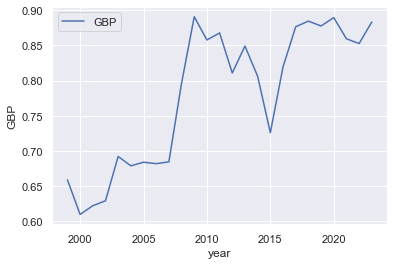

In [97]:
# Using lineplot to visualize the Time plot of USD
sns.lineplot(data=data_year_gbp, x="year", y="GBP", label='GBP')
plt.figsize=(5,3)
#plt.grid()
plt.show()

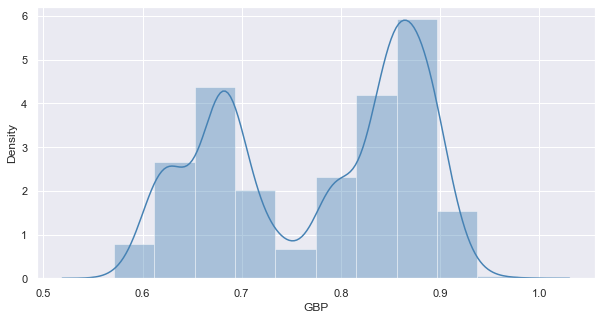

In [98]:
plt.figure(figsize=(10,5))
sns.distplot(df5_gbp.GBP, bins=10, color='steelblue');

### Split data to train and test set

In [99]:
# Training data
X_gbp = df5_gbp.loc[:, ['Time']]  # features
y_gbp = df5_gbp.loc[:, 'GBP']  # target

In [100]:
X_gbp_log = np.log(X_gbp) # Tranformation need

In [101]:
#Split data into training and test set model
X_train_gbp, X_test_gbp, y_train_gbp, y_test_gbp = train_test_split(X_gbp_log, y_gbp, test_size=0.2, shuffle=False)

In [102]:
#Split data into training and test set plot 
X_train_gbp_plot, X_test_gbp_plot, y_train_gbp_plot, y_test_gbp_plot = train_test_split(X_gbp, y_gbp, test_size=0.2, shuffle=False)

## Linear regression model

In [103]:
# Train the model
model_gbp = LinearRegression()
model_gbp.fit(X_train_gbp, y_train_gbp)

LinearRegression()

Define the linear regression model below using 'model_usd.intercept_' and 'model_usd.coef_' function.

In [104]:
model_gbp.intercept_   ## USD = a + b* Time  --> a = intercept_

0.2510809650497382

In [105]:
model_gbp.coef_   ## USD = a + b* Time  --> b = coef_

array([0.06671398])

Linear regression model is as follows:

    Linear regression model equation: y = a + b*X

    Our final model: GBP = 0.251 + 0.066*Time  

In [106]:
y_pred_gbp = model_gbp.predict(X_test_gbp)
y_pred_gbp

array([0.8188282 , 0.81884163, 0.81885507, ..., 0.8336908 , 0.83370155,
       0.8337123 ])

In [107]:
r_sq = model_gbp.score(X_train_gbp, y_train_gbp)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.4716887867067071


## Prediction

### Train data analysis

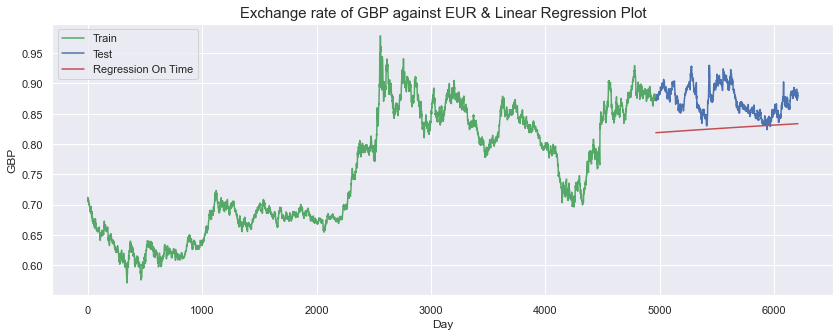

In [108]:
plt.figure(figsize=(14,5))
plt.plot(X_train_gbp_plot['Time'], y_train_gbp_plot, color='g', label = 'Train' ) 
plt.plot(X_test_gbp_plot['Time'], y_test_gbp_plot, color='b', label = 'Test') 
plt.plot(X_test_gbp_plot['Time'], y_pred_gbp, color='r', label = 'Regression On Time') 
plt.legend(loc="upper left")
plt.title('Exchange rate of GBP against EUR & Linear Regression Plot', family='Arial', fontsize=15)
plt.xlabel('Day')
plt.ylabel('GBP')
plt.show()

In [170]:
mse = mean_squared_error(y_test_gbp, y_pred_gbp)
mae = mean_absolute_error(y_test_gbp, y_pred_gbp)
mape = mean_absolute_percentage_error(y_test_gbp,y_pred_gbp)
rmse = np.sqrt(mean_squared_error(y_test_gbp, y_pred_gbp))
accuracy = (1-rmse)*100

print('Mean Absolute Error:              ', mae)
print('Mean Squared Error:               ', mse)
print('Root Mean Squared Error:          ', rmse)
print('Mean Absolute Percentage Error:   ', mape)
print('accuracy:                         ', accuracy) 

Mean Absolute Error:               0.046269854700698984
Mean Squared Error:                0.0027493667435903907
Root Mean Squared Error:           0.05243440419791562
Mean Absolute Percentage Error:    0.05232659959401204
accuracy:                          94.75655958020843


The linear regression model not underfit nor overfit as prediction resuklts are closer to the test set. RMSE is 0.0523 that shows that prediction is good fit.  

# AUD/EUR

In [110]:
#get the date and rates of Australian dollar
df5_aud = df5[['Date', 'AUD','Time']]
df5_aud.columns = ['Date', 'AUD','Time']
df5_aud.sort_values(by='Date', inplace = True)

In [111]:
df5_aud.head()

,Date,AUD,Time
6205,1999-01-04,1.9100,1
6204,1999-01-05,1.8944,2
6203,1999-01-06,1.8820,3
6202,1999-01-07,1.8474,4
6201,1999-01-08,1.8406,5


In [112]:
df5_aud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6206 entries, 6205 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6206 non-null   datetime64[ns]
 1   AUD     6206 non-null   float64       
 2   Time    6206 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 169.7 KB


In [113]:
df5_aud['Date'] = pd.to_datetime(df5_aud['Date'])
df5_aud['Date']

6205   1999-01-04
6204   1999-01-05
6203   1999-01-06
6202   1999-01-07
6201   1999-01-08
          ...    
4      2023-03-17
3      2023-03-20
2      2023-03-21
1      2023-03-22
0      2023-03-23
Name: Date, Length: 6206, dtype: datetime64[ns]

In [114]:
#Year
df5_aud['Date'].dt.year

6205    1999
6204    1999
6203    1999
6202    1999
6201    1999
        ... 
4       2023
3       2023
2       2023
1       2023
0       2023
Name: Date, Length: 6206, dtype: int64

In [115]:
#Month
df5_aud['Date'].dt.month

6205    1
6204    1
6203    1
6202    1
6201    1
       ..
4       3
3       3
2       3
1       3
0       3
Name: Date, Length: 6206, dtype: int64

In [116]:
#Day
df5_aud['Date'].dt.day

6205     4
6204     5
6203     6
6202     7
6201     8
        ..
4       17
3       20
2       21
1       22
0       23
Name: Date, Length: 6206, dtype: int64

In [117]:
df5_aud['year']=df5_aud['Date'].dt.year
df5_aud['month']=df5_aud['Date'].dt.month
df5_aud['day']=df5_aud['Date'].dt.day
df5_aud.head()

,Date,AUD,Time,year,month,day
6205,1999-01-04,1.9100,1,1999,1,4
6204,1999-01-05,1.8944,2,1999,1,5
6203,1999-01-06,1.8820,3,1999,1,6
6202,1999-01-07,1.8474,4,1999,1,7
6201,1999-01-08,1.8406,5,1999,1,8


In [118]:
#Lineplot- groupby by year and it's mean.
data_year_aud = df5_aud.groupby('year')['AUD'].mean().reset_index(name='AUD')

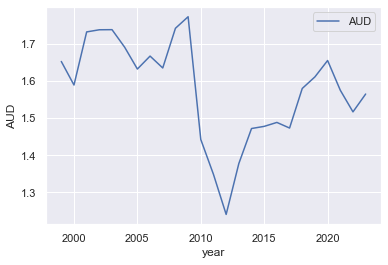

In [119]:
# Using lineplot to visualize the Time plot of AUD
sns.lineplot(data=data_year_aud, x="year", y="AUD", label='AUD')
plt.figsize=(5,3)
#plt.grid()
plt.show()

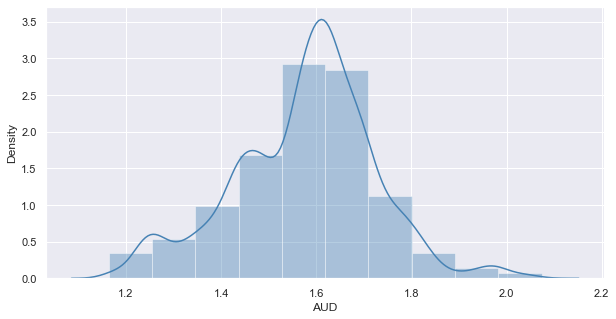

In [120]:
plt.figure(figsize=(10,5))
sns.distplot(df5_aud.AUD, bins=10, color='steelblue');

## Split data

In [121]:
# Training data
X_aud = df5_aud.loc[:, ['Time']]  # features
y_aud = df5_aud.loc[:, 'AUD']  # target

In [122]:
X_aud_log = np.log(X_aud) # Tranformation need

Used np.log() function as need to transfrom X(Time) variable to improve the model.

In [123]:
#Split data into training and test set model
X_train_aud, X_test_aud, y_train_aud, y_test_aud = train_test_split(X_aud_log, y_aud, test_size=0.2, shuffle=False)

In [124]:
#Split data into training and test set plot 
X_train_aud_plot, X_test_aud_plot, y_train_aud_plot, y_test_aud_plot = train_test_split(X_aud, y_aud, test_size=0.2, shuffle=False)

## Linear regression model

In [125]:
# Train the model
model_aud = LinearRegression()
model_aud.fit(X_train_aud, y_train_aud)

LinearRegression()

In [126]:
model_aud.intercept_   # AUD = a + b* Time  --> a = intercept_

2.138708823088444

In [127]:
model_aud.coef_   ## AUD = a + b* Time  --> b = coef_

array([-0.07518806])

Linear regression model is as follows:

    Linear regression model equation: y = a + b*X

    Our final model: AUD = 2.138 + (-0.075)*Time  

In [128]:
y_pred_aud = model_aud.predict(X_test_aud)
y_pred_aud

array([1.49884575, 1.49883061, 1.49881547, ..., 1.48209528, 1.48208316,
       1.48207105])

In [129]:
r_sq = model_aud.score(X_train_aud, y_train_aud)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.20799283938704427


## Prediction

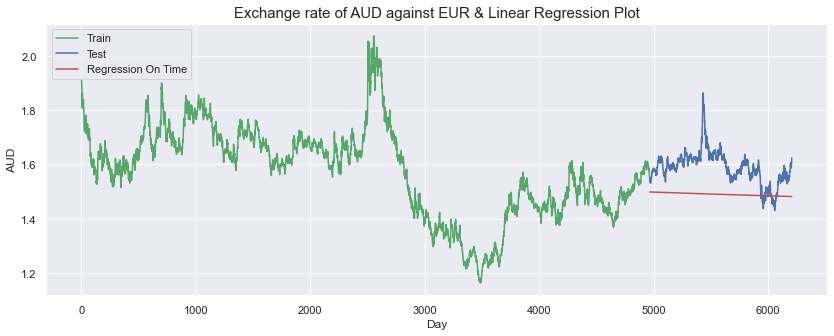

In [130]:
plt.figure(figsize=(14,5))
plt.plot(X_train_aud_plot['Time'], y_train_aud_plot, color='g', label = 'Train' ) 
plt.plot(X_test_aud_plot['Time'], y_test_aud_plot, color='b', label = 'Test') 
plt.plot(X_test_aud_plot['Time'], y_pred_aud, color='r', label = 'Regression On Time') 
plt.legend(loc="upper left")
plt.title('Exchange rate of AUD against EUR & Linear Regression Plot', family='Arial', fontsize=15)
plt.xlabel('Day')
plt.ylabel('AUD')
plt.show()

In [131]:
mse = mean_squared_error(y_test_aud, y_pred_aud)
mae = mean_absolute_error(y_test_aud, y_pred_aud)
mape = mean_absolute_percentage_error(y_test_aud,y_pred_aud)
rmse = np.sqrt(mean_squared_error(y_test_aud, y_pred_aud))
accuracy = (1-rmse)*100

print('Mean Absolute Error:              ', mae)
print('Mean Squared Error:               ', mse)
print('Root Mean Squared Error:          ', rmse)
print('Mean Absolute Percentage Error:   ', mape)
print('accuracy:                         ', accuracy) 

Mean Absolute Error:               0.09964004491558748
Mean Squared Error:                0.012671762526071257
Root Mean Squared Error:           0.11256892344724301
Mean Absolute Percentage Error:    0.0616818168482701
accuracy:                          88.7431076552757


# CAD/EUR

In [132]:
#Extract the date and rates of Canadian dollar from df5 data
df5_cad = df5[['Date', 'CAD','Time']]
df5_cad.columns = ['Date', 'CAD','Time']
df5_cad.sort_values(by='Date', inplace = True)

In [133]:
df5_cad

,Date,CAD,Time
6205,1999-01-04,1.8004,1
6204,1999-01-05,1.7965,2
6203,1999-01-06,1.7711,3
6202,1999-01-07,1.7602,4
6201,1999-01-08,1.7643,5
...,...,...,...
4,2023-03-17,1.4584,6202
3,2023-03-20,1.4669,6203
2,2023-03-21,1.4726,6204
1,2023-03-22,1.4782,6205


In [134]:
df5_cad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6206 entries, 6205 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6206 non-null   datetime64[ns]
 1   CAD     6206 non-null   float64       
 2   Time    6206 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 169.7 KB


In [135]:
df5_cad['Date'] = pd.to_datetime(df5_cad['Date'])
df5_cad['Date']

6205   1999-01-04
6204   1999-01-05
6203   1999-01-06
6202   1999-01-07
6201   1999-01-08
          ...    
4      2023-03-17
3      2023-03-20
2      2023-03-21
1      2023-03-22
0      2023-03-23
Name: Date, Length: 6206, dtype: datetime64[ns]

In [136]:
#Year
df5_cad['Date'].dt.year

6205    1999
6204    1999
6203    1999
6202    1999
6201    1999
        ... 
4       2023
3       2023
2       2023
1       2023
0       2023
Name: Date, Length: 6206, dtype: int64

In [137]:
#Month
df5_cad['Date'].dt.month

6205    1
6204    1
6203    1
6202    1
6201    1
       ..
4       3
3       3
2       3
1       3
0       3
Name: Date, Length: 6206, dtype: int64

In [138]:
#Day
df5_cad['Date'].dt.day

6205     4
6204     5
6203     6
6202     7
6201     8
        ..
4       17
3       20
2       21
1       22
0       23
Name: Date, Length: 6206, dtype: int64

In [139]:
df5_cad['year']=df5_cad['Date'].dt.year
df5_cad['month']=df5_cad['Date'].dt.month
df5_cad['day']=df5_cad['Date'].dt.day
df5_cad.head()

,Date,CAD,Time,year,month,day
6205,1999-01-04,1.8004,1,1999,1,4
6204,1999-01-05,1.7965,2,1999,1,5
6203,1999-01-06,1.7711,3,1999,1,6
6202,1999-01-07,1.7602,4,1999,1,7
6201,1999-01-08,1.7643,5,1999,1,8


In [140]:
#Lineplot- groupby by year and it's mean.
data_year_cad = df5_cad.groupby('year')['CAD'].mean().reset_index(name='CAD')

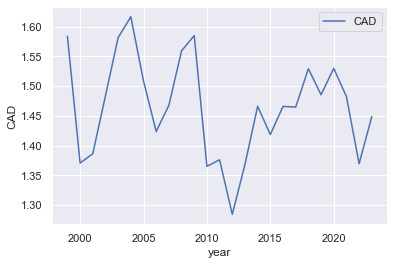

In [141]:
# Using lineplot to visualize the Time plot of CAD/EUR
sns.lineplot(data=data_year_cad, x="year", y="CAD", label='CAD')
plt.figsize=(5,3)
#plt.grid()
plt.show()

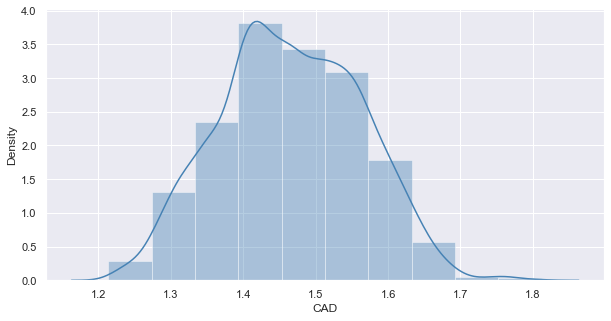

In [142]:
plt.figure(figsize=(10,5))
sns.distplot(df5_cad.CAD, bins=10, color='steelblue');

## Split data

In [143]:
# Training data
X_cad = df5_cad.loc[:, ['Time']]  # features
y_cad = df5_cad.loc[:, 'CAD']  # target

In [144]:
X_cad_log = np.log(X_cad) # Tranformation need

Used np.log() function as need to transfrom X(Time) variable to improve the model.

In [145]:
#Split data into training and test set model
X_train_cad, X_test_cad, y_train_cad, y_test_cad = train_test_split(X_cad_log, y_cad, test_size=0.2, shuffle=False)

In [146]:
#Split data into training and test set plot 
X_train_cad_plot, X_test_cad_plot, y_train_cad_plot, y_test_cad_plot = train_test_split(X_cad, y_cad, test_size=0.2, shuffle=False)

## Linear regression model

In [147]:
# Train the model
model_cad = LinearRegression()
model_cad.fit(X_train_cad, y_train_cad)

LinearRegression()

In [148]:
model_cad.intercept_   # CAD = a + b* Time  --> a = intercept_

1.6688756874818114

In [149]:
model_cad.coef_   ## CAD = a + b* Time  --> b = coef_

array([-0.02729259])

Linear regression model is as follows:

    Linear regression model equation: y = a + b*X

    Our final model: CAD = 1.6688 + (-0.027)*Time

In [150]:
y_pred_cad = model_cad.predict(X_test_cad)
y_pred_cad

array([1.43661116, 1.43660567, 1.43660017, ..., 1.43053089, 1.4305265 ,
       1.4305221 ])

In [151]:
r_sq = model_cad.score(X_train_cad, y_train_cad)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.068202865079941


## Prediction

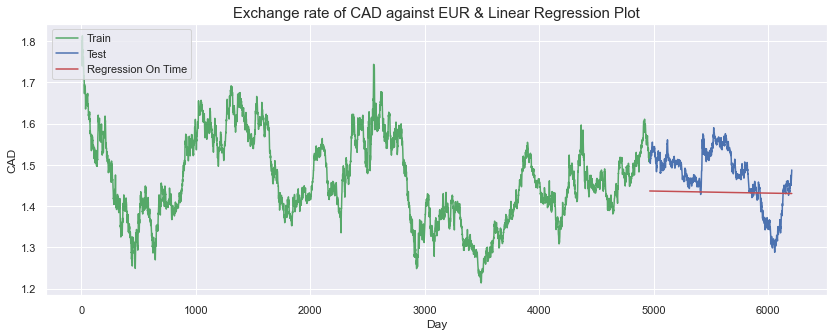

In [152]:
plt.figure(figsize=(14,5))
plt.plot(X_train_cad_plot['Time'], y_train_cad_plot, color='g', label = 'Train' ) 
plt.plot(X_test_cad_plot['Time'], y_test_cad_plot, color='b', label = 'Test') 
plt.plot(X_test_cad_plot['Time'], y_pred_cad, color='r', label = 'Regression On Time') 
plt.legend(loc="upper left")
plt.title('Exchange rate of CAD against EUR & Linear Regression Plot', family='Arial', fontsize=15)
plt.xlabel('Day')
plt.ylabel('CAD')
plt.show()

In [153]:
mse = mean_squared_error(y_test_cad, y_pred_cad)
mae = mean_absolute_error(y_test_cad, y_pred_cad)
mape = mean_absolute_percentage_error(y_test_cad,y_pred_cad)
rmse = np.sqrt(mean_squared_error(y_test_cad, y_pred_cad))
accuracy = (1-mape)*100

print('Mean Absolute Error:              ', mae)
print('Mean Squared Error:               ', mse)
print('Root Mean Squared Error:          ', rmse)
print('Mean Absolute Percentage Error:   ', mape)
print('accuracy:                         ', accuracy) 

Mean Absolute Error:               0.06516963504622109
Mean Squared Error:                0.005708600170745375
Root Mean Squared Error:           0.07555527890720393
Mean Absolute Percentage Error:    0.04405772162898173
accuracy:                          95.59422783710183
